# Linear Programming

This notebook introduces the concept of linear programming, provides a function for solving a linear program, and provides an example.

## Introduction

Many problems that operations researchers are asked to solve involve the optimization of decisions in resource constrained environments.  To accomplish this, we first describe the studied scenario as a series of equations.  If these equations can be described in a linear fashion, we can use build and solve a linear program to optimize the scenario.

To solve a linear program in Python, we will use the PuLP module.

## Example

<b> Scenario: </b> Giapetto's Woodcarving Inc. manufactures two types of wooden toys: soldiers and trains.  A soldier sells for \\$27 and uses \\$10 worth of raw materials.  Each soldier that is manufactured increases Giapetto's variable labor and overhead costs by \\$14.  A train sells for \\$21 and uses \\$9 worth of raw materials.  Each train increases Giapetto's variable labor and overhead costs by \\$10.  The manufacture of wooden soliders and trains require two types of skilled labor: carpentry and finishing.  A soldier requies 2 hours of finishing labor and 1 hour of carpentry labor.  A train requires 1 hour of finishing labor and 1 hour of carpentry labor.  Each week, Giapetto can obtain all the needed raw material but only 100 finishing hours and 80 carpentry hours.  Demand for trains is unlimited, but at most 40 soldiers are bought each week.  Giapetto wants to maximize weekly profit.

<b> Interpretation: </b>
- The objective of this scenario is to maximize Giapetto's weekly profit.
- Profit = Revenue - Cost.  The profit on each toy soldier is \\$27 - (\\$10 + \\$14) = \\$3.  The profit on each train is \\$21 - (\\$9 + \\$10) = \\$2.
- The decisions that Giapetto is able to make which might affect his profits are (1) the number of soldiers to make ($x_1$) and (2) the number of trains to make ($x_2$).
- The factors that are constraining the scenario are (1) limited finishing labor, (2) limited carpentry labor, and (3) limited demand for toy soldiers.
- Giapetto cannot make a negative number of toy soldiers or trains.

<b> Formulation: </b>
- Objective Function: Maximize $3x_1 + 2x_2$
- Finishing Constraint: $2x_1 + x_2 \le 100$
- Carpentry Constraint: $x_1 + x_2 \le 80$
- Demand Constraint: $x_1 \le 40$
- Non-Negativity Constraint: $x_1, x_2 \ge 0$

<b> Visualization: </b> Graphing the constraints, we find the feasible region of possible soldier/train combinations that Giapetto is able to create with his limited resources.

<div>
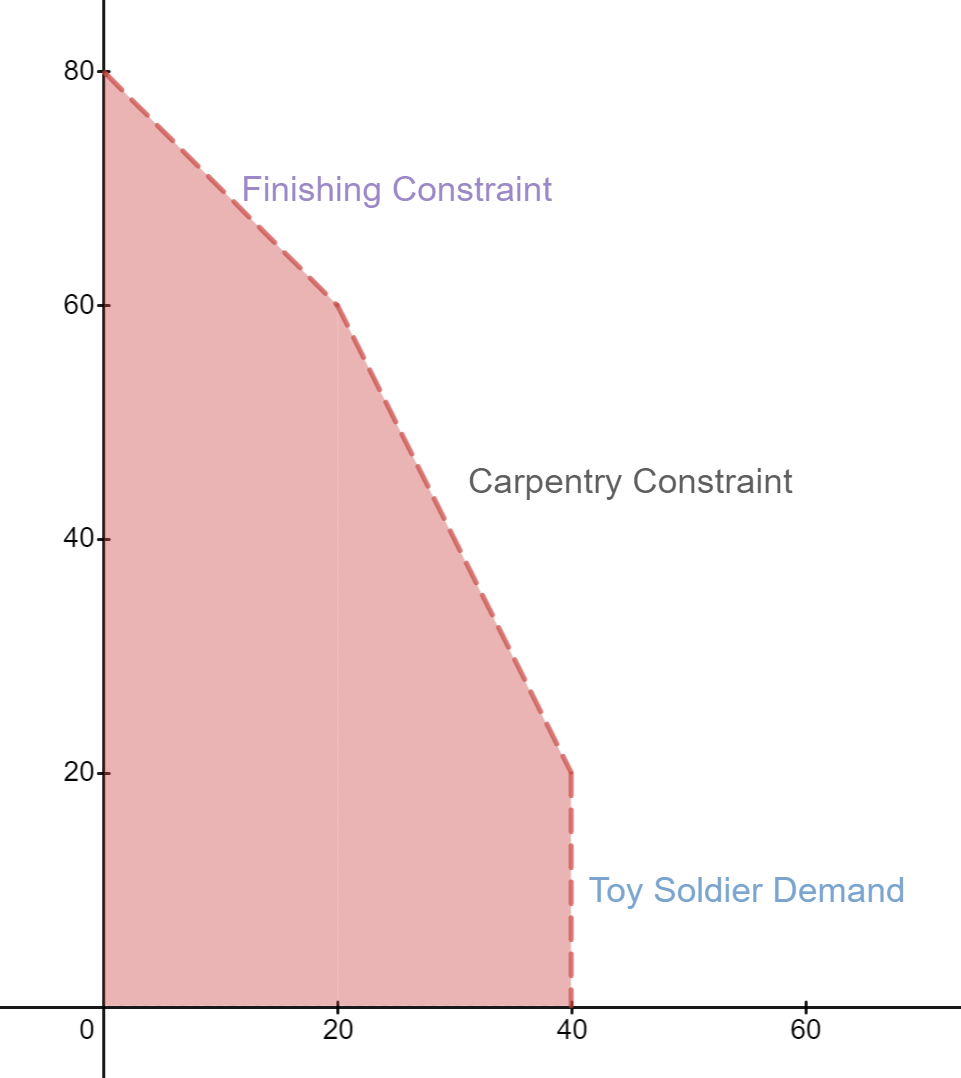
</div>

Using the PuLP module in Python, we can formulate and solve this linear program.

In [7]:
from pulp import LpMaximize, LpProblem, LpStatus, LpVariable

model = LpProblem(name = 'Giapettos Workshop', sense = LpMaximize)                      # Initialize model

x_1 = LpVariable(name = 'Number Toy Soldiers', lowBound = 0)                            # Define Variable 1
x_2 = LpVariable(name = 'Number Toy Trains', lowBound = 0)                              # Define Variable 2

model += 3 * x_1 + 2 * x_2                                                              # Add Objective Function
model += (2 * x_1 + x_2 <= 100, 'Finishing Constraint')                                 # Add Finishing Constraint
model += (x_1 + x_2 <= 80, 'Carpentry Constraint')                                      # Add Carpentry Constraint
model += (x_1 <= 40, 'Demand Constraint')                                               # Add Demand Constraint

status = model.solve()                                                                  # Solve model

print(f'Status: {LpStatus[model.status]}')                                              # Print model outputs
print(f'Objective: {model.objective.value()}')
for var in model.variables():
    print(f'{var.name}: {var.value()}')
for name, constraints in model.constraints.items():
    print(f'{name}:  Shadow Price: {constraints.pi}, Slack: {constraints.slack}')

Status: Optimal
Objective: 180.0
Number_Toy_Soldiers: 20.0
Number_Toy_Trains: 60.0
Finishing_Constraint:  Shadow Price: 1.0, Slack: -0.0
Carpentry_Constraint:  Shadow Price: 1.0, Slack: -0.0
Demand_Constraint:  Shadow Price: -0.0, Slack: 20.0


Based on the computed linear program, we find that the maximum weekly profit Giapetto is able to earn is \\$180.  To achieve this outcome, Giapetto should create 20 toy soldiers and 60 toy trains.  At this level of production, there are 20 units of toy solider demand that will not be met (i.e., slack).  The shadow prices on the finishing and carpentry constraints are both \\$1, indicating that increasing either resource capacity by 1 unit would resolve in a \\$1 increase in profit.